In [248]:
import numpy as np
import matplotlib.pylab as plt

import sys
coast_dir='/home/users/jholt/Git/COAsT/'
sys.path.insert(0,coast_dir)
import coast

In [249]:
fn_config_u_grid='./example_nemo_grid_u.json'
fn_config_v_grid='./example_nemo_grid_v.json'
fn_config_t_grid='./example_nemo_grid_t.json'

In [250]:
ystart=1991
ystop=1991
names,dpaths,DOMS,_  = coast.experiments(experiments='experiments_paper.json')
nemo_U={}
##%%
iexp=4
fn_nemo_dat_u= coast.nemo_filename_maker(dpaths[iexp],ystart,ystop,grid='U') 
fn_nemo_dat_v= coast.nemo_filename_maker(dpaths[iexp],ystart,ystop,grid='V')
nemo_t=coast.CurrentsOnT(fn_domain=DOMS[iexp],config='example_nemo_grid_t.json',multiple =True,no_depths=True)
nemo_u = coast.Gridded(fn_data=fn_nemo_dat_u, config=fn_config_u_grid,multiple=True)
nemo_v = coast.Gridded(fn_data=fn_nemo_dat_v, config=fn_config_v_grid,multiple=True)
#NWS
x_min = -12;x_max = 13;y_min = 45;y_max = 60
j,i,_=nemo_t.find_j_i_list(lon=[x_min,x_max,x_max,x_min],lat=[y_min,y_min,y_max,y_max])
imin=min(i)
imax=max(i)
jmin=min(j)
jmax=max(j) 
nemo_t.subset(y_dim=range(jmin,jmax),x_dim=range(imin,imax))
nemo_u.subset(y_dim=range(jmin,jmax),x_dim=range(imin,imax))
nemo_v.subset(y_dim=range(jmin,jmax),x_dim=range(imin,imax))

/home/users/jholt/Git/COAsT/coast/data/gridded.py:237: UserWarning: The model domain loaded, '/gws/nopw/j04/class_vol2/senemo/RUNS2024r01/GS1p2_full/config/domain_cfg.nc', does not contain the bathy_metry' variable. This will result in the NEMO.dataset.bathymetry variable being set to zero, which may result in unexpected behaviour from routines that require this variable.
/home/users/jholt/Git/COAsT/coast/_utils/logging_util.py:100: UserWarning: /home/users/jholt/Git/COAsT/coast/data/gridded.py._setup_grid_obj.93: No NEMO domain specified, only limited functionality will be available
/home/users/jholt/Git/COAsT/coast/_utils/logging_util.py:100: UserWarning: /home/users/jholt/Git/COAsT/coast/data/gridded.py._setup_grid_obj.93: No NEMO domain specified, only limited functionality will be available


In [251]:
nemo_u.dataset

<xarray.Dataset> Size: 130MB
Dimensions:               (t_dim: 12, y_dim: 109, x_dim: 105, nvertex: 4,
                           z_dim: 75, axis_nbounds: 2)
Coordinates:
    latitude              (y_dim, x_dim) float32 46kB dask.array<chunksize=(63, 62), meta=np.ndarray>
    longitude             (y_dim, x_dim) float32 46kB dask.array<chunksize=(63, 62), meta=np.ndarray>
  * depthu                (z_dim) float32 300B 0.5058 1.556 ... 5.902e+03
    time_centered         (t_dim) datetime64[ns] 96B dask.array<chunksize=(1,), meta=np.ndarray>
  * time                  (t_dim) datetime64[ns] 96B 1991-01-16T12:00:00 ... ...
Dimensions without coordinates: t_dim, y_dim, x_dim, nvertex, z_dim,
                                axis_nbounds
Data variables:
    bounds_nav_lon        (t_dim, y_dim, x_dim, nvertex) float32 2MB dask.array<chunksize=(1, 63, 62, 4), meta=np.ndarray>
    bounds_nav_lat        (t_dim, y_dim, x_dim, nvertex) float32 2MB dask.array<chunksize=(1, 63, 62, 4), meta=np.ndarray>
    area                  (t_dim, y_dim, x_dim) float32 549kB dask.array<chunksize=(1, 63, 62), meta=np.ndarray>
    depthu_bounds         (t_dim, z_dim, axis_nbounds) float32 7kB dask.array<chunksize=(1, 75, 2), meta=np.ndarray>
    time_centered_bounds  (t_dim, axis_nbounds) datetime64[ns] 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds   (t_dim, axis_nbounds) datetime64[ns] 192B dask.array<chunksize=(1, 2), meta=np.ndarray>
    thkcello              (t_dim, z_dim, y_dim, x_dim) float32 41MB dask.array<chunksize=(1, 75, 63, 62), meta=np.ndarray>
    sozocrtx              (t_dim, y_dim, x_dim) float32 549kB dask.array<chunksize=(1, 63, 62), meta=np.ndarray>
    u_velocity            (t_dim, z_dim, y_dim, x_dim) float32 41MB dask.array<chunksize=(1, 75, 63, 62), meta=np.ndarray>
    u2o                   (t_dim, z_dim, y_dim, x_dim) float32 41MB dask.array<chunksize=(1, 75, 63, 62), meta=np.ndarray>
    tauuo                 (t_dim, y_dim, x_dim) float32 549kB dask.array<chunksize=(1, 63, 62), meta=np.ndarray>
Attributes:
    name:         SENEMO_1m_19910101_19911231_grid_U
    description:  ocean U grid variables
    title:        ocean U grid variables
    Conventions:  CF-1.6
    timeStamp:    2024-Oct-11 13:47:18 GMT
    uuid:         39c7ec01-b5a9-4efd-bc3f-240978428981

In [252]:
nemo_t.currents_on_t(nemo_u,nemo_v,u_variable='u2o',v_variable='v2o')

In [253]:
print(nemo_t.dataset)

<xarray.Dataset> Size: 138MB
Dimensions:        (y_dim: 109, x_dim: 105, z_dim: 75, t_dim: 12)
Coordinates:
    longitude      (y_dim, x_dim) float64 92kB -13.72 -13.47 ... 17.56 17.82
    latitude       (y_dim, x_dim) float64 92kB 45.13 45.12 45.12 ... 58.97 58.92
    depth_0        (z_dim, y_dim, x_dim) float64 7MB 0.5061 0.5062 ... 6.081e+03
    time_centered  (t_dim) datetime64[ns] 96B dask.array<chunksize=(1,), meta=np.ndarray>
  * time           (t_dim) datetime64[ns] 96B 1991-01-16T12:00:00 ... 1991-12...
Dimensions without coordinates: y_dim, x_dim, z_dim, t_dim
Data variables:
    bathymetry     (y_dim, x_dim) float32 46kB ...
    e1             (y_dim, x_dim) float64 92kB ...
    e2             (y_dim, x_dim) float64 92kB ...
    e3_0           (z_dim, y_dim, x_dim) float64 7MB ...
    bottom_level   (y_dim, x_dim) int32 46kB ...
    ut_velocity    (t_dim, z_dim, y_dim, x_dim) float32 41MB dask.array<chunksize=(1, 75, 63, 62), meta=np.ndarray>
    vt_velocity    (t_dim, z_dim

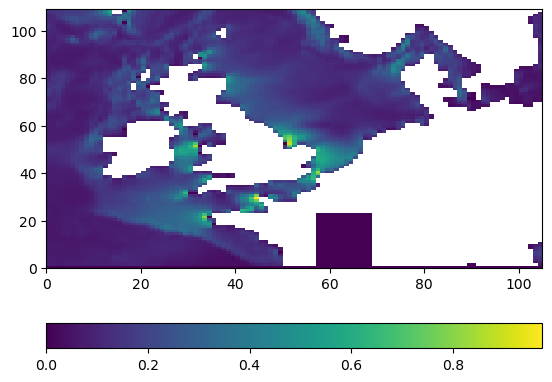

In [254]:
plt.pcolormesh(np.sqrt(nemo_t.dataset.vt_velocity[0,0,:,:]));plt.colorbar(orientation='horizontal')

In [255]:
mbot = nemo_t.dataset.bottom_level

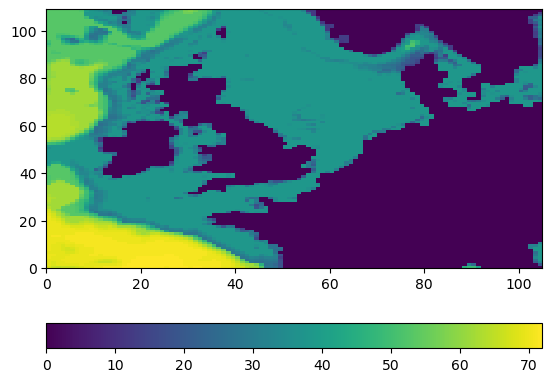

In [256]:
plt.pcolormesh(mbot);plt.colorbar(orientation='horizontal')

In [257]:
ut_bot = nemo_t.dataset.ut_velocity[7,mbot[:,:]-1,:,:]
vt_bot = nemo_t.dataset.vt_velocity[7,mbot[:,:]-1,:,:]

In [258]:
mbot[80,80]

<xarray.DataArray 'bottom_level' ()> Size: 4B
array(0, dtype=int32)
Coordinates:
    longitude  float64 8B 9.496
    latitude   float64 8B 56.35

In [259]:
nemo_t.dataset.vt_velocity[0,38-1,60,80].values

array(0.00156982, dtype=float32)

In [260]:
vt_bot [60,80].values

array(0.0022547, dtype=float32)

In [261]:
print(nemo_t.dataset.vt_velocity[0,:,60,80].values[:])
print(nemo_t.dataset.e3_0[:,60,80].values[:])


[0.00617491 0.00616371 0.00614375 0.00611783 0.00608793 0.00605574
 0.00602032 0.00597839 0.00593027 0.00587744 0.0058188  0.00575329
 0.0056781  0.0055862  0.00548309 0.00537616 0.00526897 0.00516245
 0.00505651 0.00495122 0.00484439 0.00473603 0.00462684 0.00451769
 0.00440749 0.00429379 0.00417667 0.00405585 0.0039297  0.00379788
 0.00365944 0.00351012 0.00334813 0.00316508 0.00295649 0.00269909
 0.00233044 0.00156982        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan]
[3.15789449e-01 3.15789449e-01 3.15789449e-01 3.15789449e-01
 3.15789449e-01 3.15789449e-01 3.15789449e-01 3.15789449e-01
 3.15789449e-01 3.15789449e-01 3.157894

In [262]:
e3_0_mask=np.ma.masked_where(np.isnan(nemo_t.dataset.vt_velocity[0,:,:,:]),nemo_t.dataset.e3_0[:,:,:])

In [263]:
print(e3_0_mask[:,60,80])

[0.31578944858751795 0.31578944858751795 0.315789448587518
 0.3157894485875179 0.3157894485875181 0.3157894485875179
 0.3157894485875179 0.3157894485875179 0.31578944858751834
 0.3157894485875179 0.31578944858751834 0.31578944858751745
 0.3157894485875179 0.3157894485875179 0.3157894485875188
 0.315789448587517 0.3157894485875188 0.3157894485875179
 0.3157894485875179 0.3157894485875179 0.3157894485875188
 0.3157894485875179 0.315789448587517 0.3157894485875179
 0.3157894485875188 0.315789448587517 0.3157894485875179
 0.3157894485875179 0.31578944858751967 0.3157894485875179
 0.3157894485875179 0.3157894485875161 0.31578944858751967
 0.3157894485875179 0.3157894485875179 0.3157894485875179
 0.3157894485875179 0.3157894485875179 -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 --]


In [264]:
ubar2=((nemo_t.dataset.ut_velocity[:,:,:,:].mean(dim='t_dim') * e3_0_mask[:,:,:]).sum(dim='z_dim',skipna=True)
       /np.nansum(e3_0_mask[:,:,:],axis=0))
vbar2=((nemo_t.dataset.vt_velocity[:,:,:,:].mean(dim='t_dim') * e3_0_mask[:,:,:]).sum(dim='z_dim',skipna=True)
       /np.nansum(e3_0_mask[:,:,:],axis=0))

In [265]:
U3=(ubar2 +vbar2)**(3/2)

In [266]:
S1=np.ma.masked_where(nemo_t.dataset.bathymetry.values==0.,np.log10( nemo_t.dataset.bathymetry / U3))
print(nemo_t.dataset.bathymetry.values[22,35])



0.0


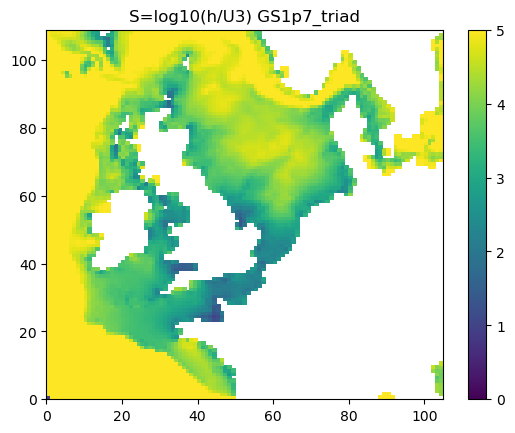

In [267]:
EXP_NAM=names[iexp]
plt.pcolor(S1,vmax=5, vmin=0);plt.colorbar(orientation='vertical')
plt.title('S=log10(h/U3) {0}'.format(EXP_NAM))
plt.savefig('../Figures/Fronts_S_{0}.png'.format(EXP_NAM))

In [268]:
EXP_NAM=names[iexp]
fn_data='/home/users/jholt/work/SENEMO/ASSESSMENT/ORCA025-SE-NEMO/ORCA025-SE-NEMO_1990_2019_'+EXP_NAM+'_SST_SSS_PEA_MonClimate.nc'
fn_domain='/gws/nopw/j04/class_vol2/senemo/jdha/FINAL_TESTING/EXP_MESv2_NOTAPER_WAV_DJC_NTM_TDISSx2/config/domain_cfg.nc'
config='example_nemo_grid_t.json'
nemo_clim=coast.Gridded(fn_data=fn_data,fn_domain=fn_domain,config=config)
nemo_clim.subset(y_dim=range(jmin,jmax),x_dim=range(imin,imax))

/home/users/jholt/Git/COAsT/coast/data/gridded.py:237: UserWarning: The model domain loaded, '/gws/nopw/j04/class_vol2/senemo/jdha/FINAL_TESTING/EXP_MESv2_NOTAPER_WAV_DJC_NTM_TDISSx2/config/domain_cfg.nc', does not contain the bathy_metry' variable. This will result in the NEMO.dataset.bathymetry variable being set to zero, which may result in unexpected behaviour from routines that require this variable.


In [269]:
print(nemo_clim.dataset)

<xarray.Dataset> Size: 17MB
Dimensions:          (mon_dim: 12, y_dim: 109, x_dim: 105, z_dim: 75)
Coordinates:
    latitude         (y_dim, x_dim) float64 92kB ...
    longitude        (y_dim, x_dim) float64 92kB ...
    depth_0          (z_dim, y_dim, x_dim) float64 7MB 0.5061 ... 6.081e+03
Dimensions without coordinates: mon_dim, y_dim, x_dim, z_dim
Data variables:
    Months           (mon_dim) int64 96B ...
    sst_monthy_clim  (mon_dim, y_dim, x_dim) float64 1MB ...
    sss_monthy_clim  (mon_dim, y_dim, x_dim) float64 1MB ...
    pea_monthy_clim  (mon_dim, y_dim, x_dim) float64 1MB ...
    bathymetry       (y_dim, x_dim) float32 46kB ...
    e1               (y_dim, x_dim) float64 92kB ...
    e2               (y_dim, x_dim) float64 92kB ...
    e3_0             (z_dim, y_dim, x_dim) float64 7MB ...
    bottom_level     (y_dim, x_dim) int32 46kB ...


In [270]:
PEA=nemo_clim.dataset.pea_monthy_clim[5:7,:,:].mean(dim='mon_dim')

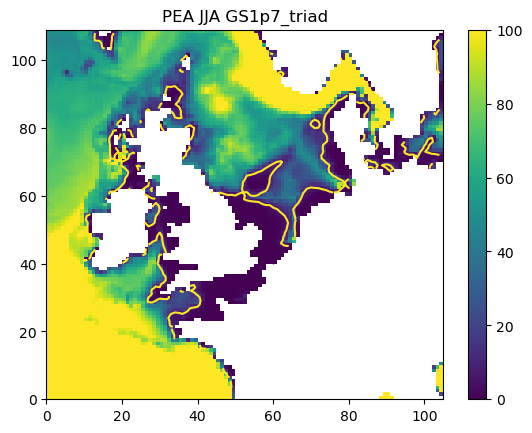

In [272]:
EXP_NAM=names[iexp]
plt.pcolormesh(PEA,vmax=100);plt.colorbar(orientation='vertical'); plt.contour(PEA,levels=[0,10]);
plt.title('PEA JJA {0}'.format(EXP_NAM))
plt.savefig('../Figures/PEA_{0}.png'.format(EXP_NAM))

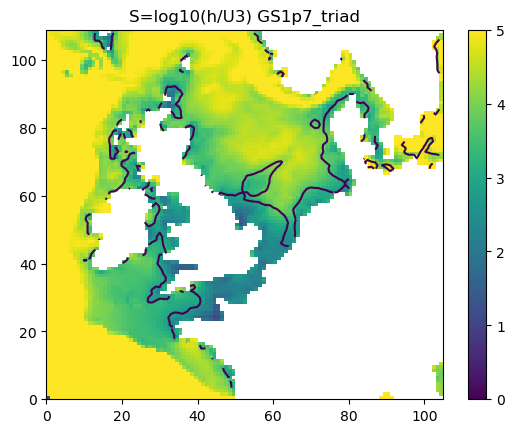

In [273]:

plt.pcolormesh(S1,vmax=5, vmin=0);plt.colorbar(orientation='vertical'); plt.contour(PEA,levels=[10]);
plt.title('S=log10(h/U3) {0}'.format(EXP_NAM))
plt.savefig('../Figures/Fronts_S_PEA_{0}.png'.format(EXP_NAM))

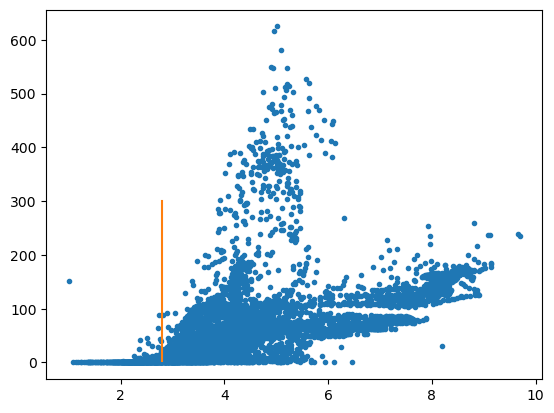

In [274]:
plt.plot(S1.ravel(),PEA.values.ravel(),'.',[2.8,2.8],[2.8,300])

In [275]:
ifront=10
nextp = np.logical_or(
np.logical_or(PEA[0:-2,1:-1]>ifront, 
                      PEA[2:,1:-1]>ifront),
np.logical_or(PEA[1:-1,0:-2]>ifront, 
                      PEA[1:-1,2:]>ifront)
)

In [276]:
ix,iy=np.where(np.logical_and(PEA[1:-1,1:-1]<ifront,nextp))

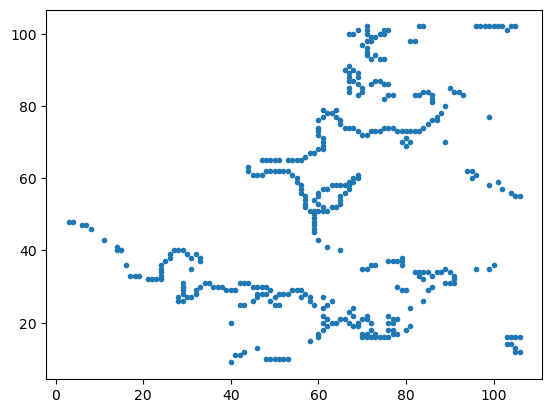

In [277]:
plt.plot(ix,iy,'.')




In [278]:
S1_front=S1[ix,iy]
S1_front=S1_front[S1_front.mask == False]

In [279]:
ii=np.where(S1_front==1)

print(ix[15],iy[15])
print(S1[22,35])
print(S1_front)

23 32
--
[3.912822152953225 3.7364771837814734 3.783373266039285 3.4249081662167282
 3.6980635759920935 3.9983481084802563 4.306219928821503 4.009590832575396
 3.9839608777667226 4.676857742117144 3.3469228748878934 2.894259001543874
 2.977903533462963 2.771105339949131 2.67879668725972 2.762454724345671
 2.8674071074893916 2.7273931717316158 2.606143904621456
 2.6282123534739417 2.631256393182966 2.5885208428213144 2.63552220733249
 2.506010081320585 2.6152243172544605 3.332151998549947 3.178442599214472
 2.8506281287485105 3.146547594201116 2.7746075334735782
 3.0842254002155998 3.292306348195739 3.197798839227423 2.9812574501548963
 3.006681272352635 3.0844988930486066 3.108253336735325 3.527700191898992
 2.9943832178895162 2.7589195180821875 2.3590784492480372
 3.384935611377019 3.026248032709922 3.999494488300874 2.8477777632599603
 2.9552808595577313 3.051347759188308 2.98732506155212 2.9244935217658083
 3.14147404476071 4.314996191864236 3.555205682815304 3.066240380836138
 3.39

(None,)

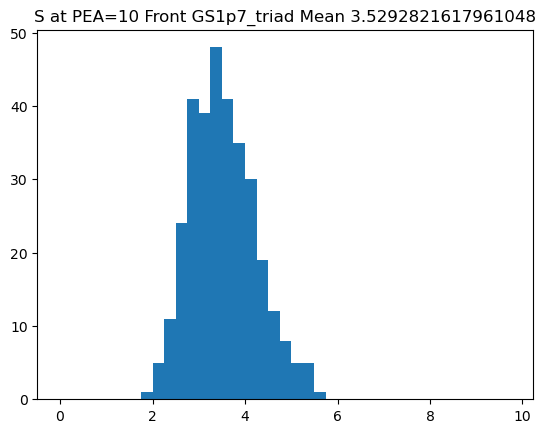

In [280]:
plt.hist(S1_front,np.arange(0,10,0.25))
plt.title('S at PEA=10 Front {1} Mean {0}'.format(np.nanmean(S1_front),EXP_NAM))
plt.savefig('../Figures/Fronts_PEA10_{0}.png'.format(EXP_NAM)),

In [88]:
EXP_NAM

'GS1p7_triad'